In [1]:
import nltk

In [4]:
import glob,re,pickle,operator,math
import string

In [5]:
from nltk.tokenize import sent_tokenize

In [6]:
import num2words

In [7]:
#functions defined for preprocessing
def word_tokenization(text):
	from nltk.tokenize import word_tokenize
	from nltk.tokenize import RegexpTokenizer

	tokenized1=word_tokenize(text)
	return tokenized1


def punctuation(text):
	punctuated=[word.strip(string.punctuation) for word in text]
	return punctuated


def stopword_removal(text):
	from nltk.corpus import stopwords
	stopword=set(stopwords.words('english'))
	removed=[word for word in text if word not in stopword]
	return removed

def digit_removal(text):
	list2=[]
	list2=[re.sub(r"\d+","",str(word)) for word in text]
	return list2

def english_words(text):
	english_list=[ word for word in text if word in dict_english]
	return english_list

def lemmatization_words(text):
	list2=[]
	from nltk.stem import WordNetLemmatizer
	lemmatizer=WordNetLemmatizer()
	list2=[lemmatizer.lemmatize(word) for word in text]
	return list2

In [8]:
# Creating the dictionary for the word of each document 
#This dictionary stores the Term Frequency value for each word
#documents are given ids from 1 to 5000
#folder 1 (in sorted order i.e comp.graphics has documents from 1 to 1000)
#Last folder talk.politics.misc folder has document numbered from 4001 to 5000


filelist1=sorted(glob.glob(r"20_newsgroups//*"))
#print(filelist1)
filelist2=[]
for files in filelist1:
	#print(files[14:])
	filelist2.append(files[14:])

#print(filelist2)
#print(num2words.num2words(35))
# dict_vocab={}
dict_doc={}
list_docs=[]
dict_doc_raw={}
# #fp2=open("combined_text","w")
i=1
doc_length={}
for files in filelist2:
	files3=sorted(glob.glob(r"20_newsgroups//"+files+ r"//*"))
	#print(files3)
	#break
	for doc in files3:
		fp=open(doc,"r",encoding="Latin-1")
		text_doc=fp.read()
		text_doc=text_doc.lower()
		fp.close()
		#print(text_doc)
		#break
		tokenized=word_tokenization(text_doc)
		punctuated=punctuation(tokenized)
		#stopword_removed=stopword_removal(punctuated)
		stopword_removed=punctuated
		lemmatized=lemmatization_words(stopword_removed)
		text_digits=[num2words.num2words(int(word)) for word in lemmatized if word.isdigit()]
		text_wdigits=[word for word in lemmatized if not word.isdigit()]
		for word in text_digits:
			text_wdigits.append(word)
		text=text_wdigits
		doc_length[i]=len(text)
		dict_doc_raw[i]=text
		#text_set=set(text)
		text_dict={}
		for word in text:
			if word in text_dict:
				text_dict[word]+=1
			else:
				text_dict[word]=1
		#print(lemmatized)
		#hold=""
		#hold=hold.join(lemmatized)
		#fp2.write(hold)
		dict_doc[i]=text_dict 
		list_docs.append(i)  
		i+=1
	#break

In [9]:
print(len(dict_doc))
accuracy_tf_score=[]
accuracy_mi_score=[]


5000


In [10]:
#randomization is performed over the doc ids list inorder to divide the dataset randomly
import random
random.shuffle(list_docs)
print(list_docs)

[4282, 1201, 4426, 4356, 337, 4461, 1122, 91, 2737, 4479, 4270, 4218, 2138, 1854, 792, 2765, 4167, 4222, 3601, 2305, 1856, 4475, 50, 3425, 3953, 2221, 4500, 2655, 4831, 3589, 4849, 446, 3823, 2650, 1400, 158, 550, 3604, 3362, 1436, 4288, 72, 4642, 4303, 818, 1353, 1561, 482, 3548, 2617, 3465, 3576, 3409, 3904, 79, 822, 1364, 3725, 1424, 2137, 3289, 2990, 2700, 1944, 802, 4885, 455, 552, 3931, 1509, 3031, 63, 3280, 627, 3812, 2875, 2777, 4070, 2441, 1627, 960, 4753, 1693, 4555, 2908, 3187, 3252, 3466, 353, 1445, 1597, 4250, 3254, 524, 4716, 2, 2905, 1205, 1676, 2626, 2506, 1264, 2808, 4304, 4525, 3188, 2016, 3817, 787, 2596, 3056, 1959, 3304, 3012, 1523, 4121, 2884, 2978, 253, 605, 4430, 987, 4015, 3833, 1213, 4824, 1906, 3989, 1884, 2369, 3801, 3237, 560, 3570, 4889, 4389, 1966, 1446, 2588, 106, 4539, 3941, 991, 3876, 1902, 3642, 4519, 3724, 2557, 831, 2128, 834, 3920, 2943, 3123, 3300, 1518, 801, 101, 3103, 1255, 487, 3198, 2273, 3457, 1459, 3270, 3620, 551, 4934, 2911, 1084, 1834, 24

In [11]:
#splitting the data into 80:20
#splitting the data into 50:50 (in next part)
#splitting the data into 70:30 (in final part)
train=list_docs[:3500]
print((train))

test=list_docs[3500:]
print(len(test))

[4282, 1201, 4426, 4356, 337, 4461, 1122, 91, 2737, 4479, 4270, 4218, 2138, 1854, 792, 2765, 4167, 4222, 3601, 2305, 1856, 4475, 50, 3425, 3953, 2221, 4500, 2655, 4831, 3589, 4849, 446, 3823, 2650, 1400, 158, 550, 3604, 3362, 1436, 4288, 72, 4642, 4303, 818, 1353, 1561, 482, 3548, 2617, 3465, 3576, 3409, 3904, 79, 822, 1364, 3725, 1424, 2137, 3289, 2990, 2700, 1944, 802, 4885, 455, 552, 3931, 1509, 3031, 63, 3280, 627, 3812, 2875, 2777, 4070, 2441, 1627, 960, 4753, 1693, 4555, 2908, 3187, 3252, 3466, 353, 1445, 1597, 4250, 3254, 524, 4716, 2, 2905, 1205, 1676, 2626, 2506, 1264, 2808, 4304, 4525, 3188, 2016, 3817, 787, 2596, 3056, 1959, 3304, 3012, 1523, 4121, 2884, 2978, 253, 605, 4430, 987, 4015, 3833, 1213, 4824, 1906, 3989, 1884, 2369, 3801, 3237, 560, 3570, 4889, 4389, 1966, 1446, 2588, 106, 4539, 3941, 991, 3876, 1902, 3642, 4519, 3724, 2557, 831, 2128, 834, 3920, 2943, 3123, 3300, 1518, 801, 101, 3103, 1255, 487, 3198, 2273, 3457, 1459, 3270, 3620, 551, 4934, 2911, 1084, 1834, 24

In [12]:
#getting the data of training and testing docs
#creating the separate dictionary of terms for the training and testing docs
train_doc_dict={}
for val in train:
    train_doc_dict[val]=dict_doc[val]
print(len(train_doc_dict))

test_doc_dict={}
for val in test:
    test_doc_dict[val]=dict_doc[val]

print(len(test_doc_dict))


3500
1500


In [13]:
#creating combined vocabulary and class wise vocabulary
dict_vocab={}
dict_vocab_class={}
#iterating over the each doc in training set
for val in train:
    text_dict=train_doc_dict[val]
    for word in text_dict:
        if word in dict_vocab:
            dict_vocab[word]+=1
        else:
            dict_vocab[word]=1
    
    if val>=1 and val<=1000:
        if "comp.graphics" not in dict_vocab_class:
            dict_vocab_class["comp.graphics"]={}
            #adding the current doc documents to the dictionary of class 1
            for word in text_dict:
                if word in dict_vocab_class["comp.graphics"]:
                    hold=dict_vocab_class["comp.graphics"]
                    hold[word]+=1
                    dict_vocab_class["comp.graphics"]=hold
                else:
                    hold=dict_vocab_class["comp.graphics"]
                    hold[word]=1
                    dict_vocab_class["comp.graphics"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["comp.graphics"]:
                    hold=dict_vocab_class["comp.graphics"]
                    hold[word]+=1
                    dict_vocab_class["comp.graphics"]=hold
                else:
                    hold=dict_vocab_class["comp.graphics"]
                    hold[word]=1
                    dict_vocab_class["comp.graphics"]=hold
        
        
    elif val>=1001 and val<=2000:
        if "rec.sport.hockey" not in dict_vocab_class:
            dict_vocab_class["rec.sport.hockey"]={}
            #adding the current doc documents to the dictionary of class 2
            for word in text_dict:
                if word in dict_vocab_class["rec.sport.hockey"]:
                    hold=dict_vocab_class["rec.sport.hockey"]
                    hold[word]+=1
                    dict_vocab_class["rec.sport.hockey"]=hold
                else:
                    hold=dict_vocab_class["rec.sport.hockey"]
                    hold[word]=1
                    dict_vocab_class["rec.sport.hockey"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["rec.sport.hockey"]:
                    hold=dict_vocab_class["rec.sport.hockey"]
                    hold[word]+=1
                    dict_vocab_class["rec.sport.hockey"]=hold
                else:
                    hold=dict_vocab_class["rec.sport.hockey"]
                    hold[word]=1
                    dict_vocab_class["rec.sport.hockey"]=hold
    
    
    elif val>=2001 and val<=3000:
        if "sci.med" not in dict_vocab_class:
            dict_vocab_class["sci.med"]={}
            #adding the current doc documents to the dictionary of class 3
            for word in text_dict:
                if word in dict_vocab_class["sci.med"]:
                    hold=dict_vocab_class["sci.med"]
                    hold[word]+=1
                    dict_vocab_class["sci.med"]=hold
                else:
                    hold=dict_vocab_class["sci.med"]
                    hold[word]=1
                    dict_vocab_class["sci.med"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["sci.med"]:
                    hold=dict_vocab_class["sci.med"]
                    hold[word]+=1
                    dict_vocab_class["sci.med"]=hold
                else:
                    hold=dict_vocab_class["sci.med"]
                    hold[word]=1
                    dict_vocab_class["sci.med"]=hold
    
    elif val >=3001 and val<=4000:
        if "sci.space" not in dict_vocab_class:
            dict_vocab_class["sci.space"]={}
            #adding the current doc documents to the dictionary of class 4
            for word in text_dict:
                if word in dict_vocab_class["sci.space"]:
                    hold=dict_vocab_class["sci.space"]
                    hold[word]+=1
                    dict_vocab_class["sci.space"]=hold
                else:
                    hold=dict_vocab_class["sci.space"]
                    hold[word]=1
                    dict_vocab_class["sci.space"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["sci.space"]:
                    hold=dict_vocab_class["sci.space"]
                    hold[word]+=1
                    dict_vocab_class["sci.space"]=hold
                else:
                    hold=dict_vocab_class["sci.space"]
                    hold[word]=1
                    dict_vocab_class["sci.space"]=hold
    
    
    else:
        
        if "talk.politics" not in dict_vocab_class:
            dict_vocab_class["talk.politics"]={}
            #adding the current doc documents to the dictionary of class 5
            for word in text_dict:
                if word in dict_vocab_class["talk.politics"]:
                    hold=dict_vocab_class["talk.politics"]
                    hold[word]+=1
                    dict_vocab_class["talk.politics"]=hold
                else:
                    hold=dict_vocab_class["talk.politics"]
                    hold[word]=1
                    dict_vocab_class["talk.politics"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["talk.politics"]:
                    hold=dict_vocab_class["talk.politics"]
                    hold[word]+=1
                    dict_vocab_class["talk.politics"]=hold
                else:
                    hold=dict_vocab_class["talk.politics"]
                    hold[word]=1
                    dict_vocab_class["talk.politics"]=hold
        


In [14]:
print(len(dict_vocab_class["rec.sport.hockey"]))
hold=dict_vocab_class["rec.sport.hockey"]
length_vocab=(len(dict_vocab))
print(length_vocab)

17798
67258


In [15]:
#calculating the likelihood probability of word in a class 
dict_prob_class={}
for cls in dict_vocab_class:
    hold=dict_vocab_class[cls]
    dict_prob={}
    length=sum(hold.values())
    for word in hold:
        prob=(hold[word] + 1 )/(length + length_vocab)
        prob=math.log(prob,10)
        dict_prob[word]=prob
        
    
    dict_prob_class[cls]=dict_prob



In [16]:
print(len(dict_prob_class["comp.graphics"]))

19325


In [17]:
#Applying Naive Bayes Algorithm on the testing document
#add-1 smoothing is used to handle the Unknowns
def naive_bayes(dict_vocab_class,dict_prob_class,test_sentence):
    score_class={}
    for cls in dict_vocab_class:
        hold2=dict_vocab_class[cls]
        hold=dict_prob_class[cls]
        length=0
        for value in hold:
            length+=hold2[value]

        #prior of class
        prob=math.log((1/5),10)
        for word in test_sentence:
            if word in hold:
                prob+=hold[word]
            else:
                prob2= 1/(length+length_vocab)
               # print(prob2)
                prob2=math.log(prob2,10)
                prob+=prob2

        score_class[cls]=prob
    sorted_dict=dict((sorted(score_class.items(), key =operator.itemgetter(1), reverse=True)))
#     print("The class of sentence is : ")
    for val in sorted_dict:
        return val


    

In [85]:
#print(score_class)

{'sci.med': -53.05854489054666, 'comp.graphics': -50.470638403520425, 'rec.sport.hockey': -55.0878602720775, 'sci.space': -53.31855961979609, 'talk.politics': -54.06616177180051}


In [18]:
k=0.6 # i.e top 60 percent words are selected as feature


In [19]:
from tqdm.notebook import tqdm as tqdm


In [20]:
#feature selection using mutual information
#The different values of N(example N11,N10 etc) are same as defined in Mutual Information Formula
dict_prob_class2={}
for cls in tqdm(dict_vocab_class):
    text=dict_vocab_class[cls]
    dict_cls2={}
    hold=dict_prob_class[cls]
    k=0.6*len(hold)
    for word in text:
        N00=0
        N01=0
        N10=0
        N11=0
        for doc in train_doc_dict:
            text2=train_doc_dict[doc]
            if word in text2:
                if doc>=1 and doc<=1000 and cls=="comp.graphics":
                    N11+=1
                elif doc>=1001 and doc<=2000 and cls=="rec.sport.hockey":
                    N11+=1
                elif doc>=2001 and doc<=3000 and cls=="sci.med":
                    N11+=1
                elif doc>=3001 and doc<=4000 and cls=="sci.space":
                    N11+=1
                elif doc>=4001 and doc<=5000 and cls=="talk.politics":
                    N11+=1
                else:
                    N10+=1
            else:
                if doc>=1 and doc<=1000 and cls=="comp.graphics":
                    N01+=1
                elif doc>=1001 and doc<=2000 and cls=="rec.sport.hockey":
                    N01+=1
                elif doc>=2001 and doc<=3000 and cls=="sci.med":
                    N01+=1
                elif doc>=3001 and doc<=4000 and cls=="sci.space":
                    N01+=1
                elif doc>=4001 and doc<=5000 and cls=="talk.politics":
                    N01+=1
                else:
                    N00+=1
        
        N1_= N10+N11
        N_1= N01 + N11
        N0_= N01 + N00
        N_0= N10 + N00
        
        N=len(train_doc_dict)
        mut_info=0
        if N>0 and N1_ >0 and N_1>0 and N_0>0 and N0_>0 and N11>0 and N00>0 and N10>0 and N01>0:
            mut_info=(N11/N) * ( math.log((N11*N)/(N1_*N_1))) + (N00/N) * ( math.log((N00*N)/(N0_*N_0))) + (N10/N) * ( math.log((N10*N)/(N1_*N_0))) + (N01/N) * ( math.log((N01*N)/(N0_*N_1)))
        dict_cls2[word]=mut_info
        
    #sorting the words on the basis of mutual information
    sorted_dict=dict((sorted(dict_cls2.items(), key =operator.itemgetter(1), reverse=True)))
    dict2={}
    #print(cls,word)
    #print(sorted_dict)
    #break
    i=1
    for val in sorted_dict:
        dict2[val]=hold[val]
        
        if(i>=k):
            break
        
        i+=1
    
    dict_prob_class2[cls]=dict2    
        

In [21]:
print(len(dict_prob_class2["comp.graphics"]))

11595


In [22]:
#Testing the classifier on the test documents
#creating confusion matrix 
def applying_nb(dict_vocab_class,dict_prob_class2):
    from sklearn import metrics
    actual=[]
    predicted=[]
    for val in test:
        test_sentence=dict_doc_raw[val]
        #getting the predicted class
        cls=naive_bayes(dict_vocab_class,dict_prob_class2,test_sentence)
        
        #storing the actual class of the document
        if val>=1 and val<=1000:
            actual.append("comp.graphics")
        elif val>=1001 and val<=2000:
            actual.append("rec.sport.hockey")
        elif val>=2001 and val<=3000:
            actual.append("sci.med")
        elif val>=3001 and val<=4000:
            actual.append("sci.space")
        else:
            actual.append("talk.politics")

        predicted.append(cls)

    confusion=metrics.confusion_matrix(actual, predicted, labels=["comp.graphics", "rec.sport.hockey", "sci.med","sci.space","talk.politics"])
    accuracy=metrics.accuracy_score(actual,predicted)
    return confusion,accuracy

    

In [23]:
#feature selection using tf_idf
#considering each class as document
dict_prob_class3={}
for cls in dict_vocab_class:
    vocab=dict_vocab_class[cls]
    dict2={}
    hold=dict_prob_class[cls]
    k=0.6*len(vocab)
    for word in vocab:
        tf=vocab[word]
        df=0
        for cls2 in dict_vocab_class:
            if word in dict_vocab_class[cls2]:
                df+=1
                
        tf_idf=math.log(1+tf)*math.log(1+(5/(1+df)))
        dict2[word]=tf_idf
        
    sorted_dict=dict((sorted(dict2.items(), key =operator.itemgetter(1), reverse=True)))
    dict3={}
    i=1
    for val in sorted_dict:
        dict3[val]=hold[val]
        
        if(i>=k):
            break
        
        i+=1
    
    dict_prob_class3[cls]=dict3 
    
    
    
    
        
                

In [24]:
print(len(dict_prob_class3["comp.graphics"]))

11595


In [25]:
#Testing the classifier on training data
#sklearn is only used here to print the confusion matrix and accuracy score
confusion_mi,accuracy_mi=applying_nb(dict_vocab_class,dict_prob_class2)
accuracy_mi_score.append(accuracy_mi)
print("Confusion Matrix using Mutual Information as Feature Selection : ")
print(confusion_mi)
print("\n")
print("Accuracy using Mutual Information as Feature Selection : ")
print(accuracy_mi)
print("\n")
confusion_tf,accuracy_tf=applying_nb(dict_vocab_class,dict_prob_class3)
print("Confusion Matrix using TF-IDF as Feature Selection : ")
print(confusion_mi)
print("\n")
print("Accuracy using TF-IDF as Feature Selection : ")
print(accuracy_tf)
accuracy_tf_score.append(accuracy_tf)



Confusion Matrix using Mutual Information as Feature Selection : 
[[288   0   0   1   0]
 [  0 313   0   0   2]
 [ 12   2 284   4   1]
 [ 11   0   1 290   1]
 [  1   1   0   3 285]]


Accuracy using Mutual Information as Feature Selection : 
0.9733333333333334


Confusion Matrix using TF-IDF as Feature Selection : 
[[288   0   0   1   0]
 [  0 313   0   0   2]
 [ 12   2 284   4   1]
 [ 11   0   1 290   1]
 [  1   1   0   3 285]]


Accuracy using TF-IDF as Feature Selection : 
0.972


Text(0, 0.5, 'Accuracy')

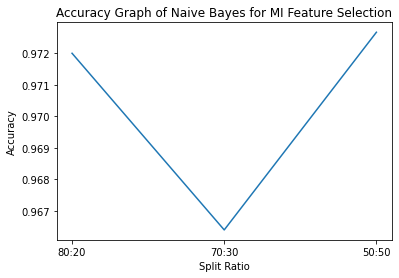

In [68]:
#Plotting the Graph
#Note the graph will only be plotted after running three times the complete
#for different testing and training ratio
accuracy_x=["80:20","70:30","50:50"]
from matplotlib import pyplot as plt
plt.title("Accuracy Graph of Naive Bayes for MI Feature Selection")
plt.plot(accuracy_x,accuracy_mi_score)
plt.xlabel("Split Ratio")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

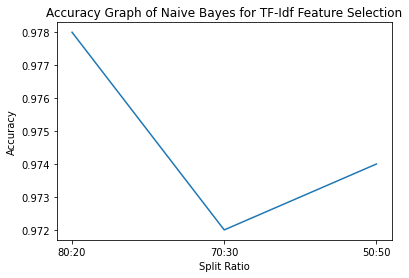

In [69]:
plt.title("Accuracy Graph of Naive Bayes for TF-Idf Feature Selection")
plt.plot(accuracy_x,accuracy_tf_score)
plt.xlabel("Split Ratio")
plt.ylabel("Accuracy")